# Project 4: Heart Disease Prediction (Classification)

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

### Step 1: Setup - Importing Libraries and Loading Data

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

In [63]:
# Dataset loading
df = pd.read_csv("https://raw.githubusercontent.com/kush-agra-soni/4_heart_disease_prediction_model/refs/heads/main/heart_disease_uci.csv")
print(f"Data shape: {df.shape}")
df.head()

Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [65]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [66]:
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
1759


#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

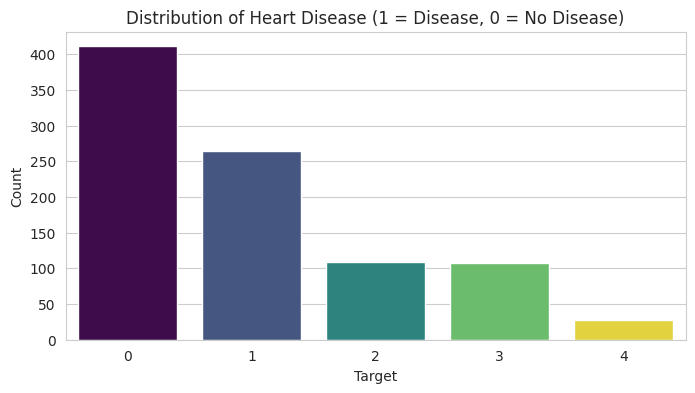

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

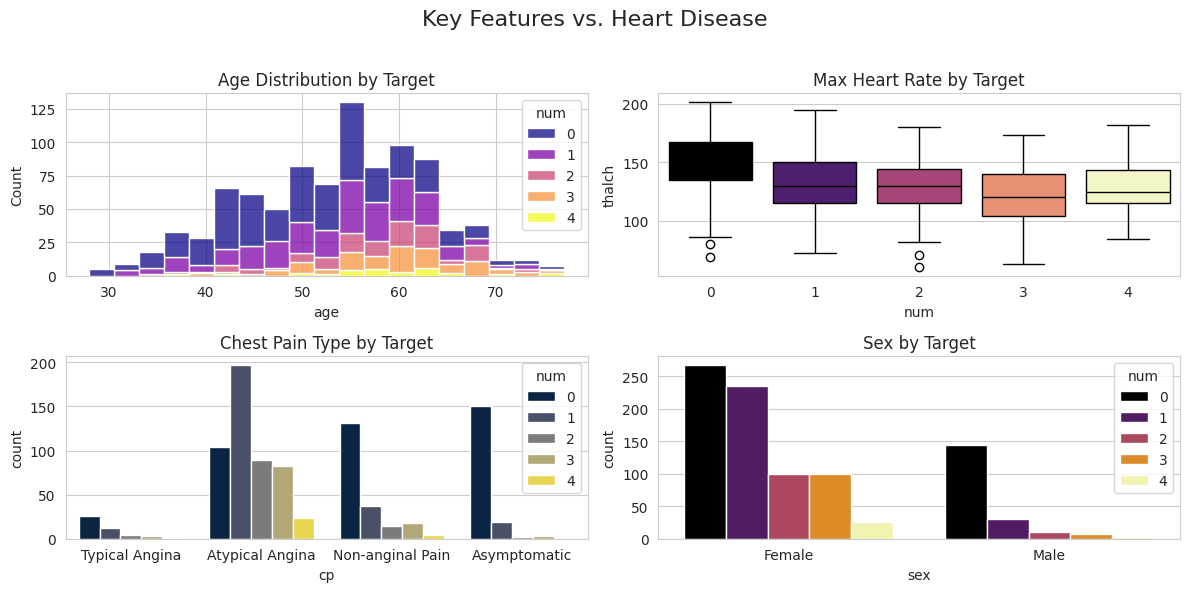

In [68]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

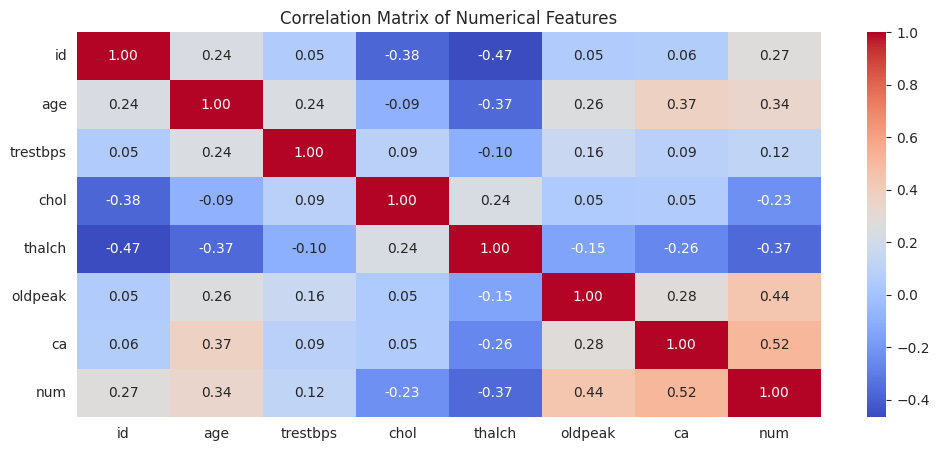

In [69]:
# Correlation Heatmap
plt.figure(figsize=(12, 5))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Insights from Raw Heart Disease Dataset

### 1. Target Variable (`num`)
- The target column `num` ranges from **0 to 4**, meaning it is **multi-class** by default.  
- But we will treat this as a **binary classification** problem:
  - **0 → No heart disease**
  - **1–4 → Presence of heart disease**
---

### 2. Missing Values
- Several features have **large proportions of missing values**:
  - `ca`: only 309/920 non-null (~33%) - DROP
  - `thal`: only 434/920 non-null (~53%) - Impute
  - `slope`: only 611/920 non-null (~66%) - Impute

---

### 3. Invalid Zero Values
- Some numeric features contain **0 values** that are biologically impossible:
  - `trestbps` (resting blood pressure) → cannot be 0
  - `chol` (cholesterol) → cannot be 0
- These zeros should be treated as **missing values** and imputed.

---

### 4. Categorical Variables
- Columns stored as `object` dtype:
  - `sex, cp, fbs, restecg, exang, slope, thal, dataset`
- Correct encoding strategy is important:
  - `sex, fbs, exang` → Binary (0/1)
  - `cp, restecg, slope, thal` → One-hot encoding
  - `dataset` → Likely not useful (source identifier), we dropp this for sure

---

### 5. Feature Scaling
- Models like **KNN** and **SVM** are sensitive to scale.
- Will ensure that **only numeric features** are standardized (e.g., using `StandardScaler` or `MinMaxScaler`).

---

### 6. Data Imbalance
- Need to check distribution of the target variable (`num`).  
- If **class imbalance** exists, strategies include:
  - Oversampling (`SMOTE`)
  - Undersampling
  - Using `class_weight='balanced'` in models

---

### 7. Feature Engineering Opportunities
- Interaction terms (e.g., `age * chol`, `age * trestbps`) may improve prediction.
- Age binning (e.g., 30–40, 40–50, etc.) could capture risk groups.
- Domain knowledge suggests `chol`, `trestbps`, `thalch`, and `oldpeak` are best.

---
### Next Steps
1. **Binarize** the target variable (`num > 0 → 1`).  
2. **Handle invalid zeros** in `trestbps` and `chol`.  
3. Decide strategy for high-missing features (`ca`, `thal`, `slope`).  
4. Apply **proper encoding** for categorical variables.  
5. Scale only numeric features.  
6. Re-train models and evaluate performance.  

### Step 3: Data Preprocessing


###3.1 Drop Useless Columns

In [70]:
# Drop ID and dataset source column
df = df.drop(columns=["id", "dataset", "ca"])

###3.2 Binarize Target Variable

In [71]:
# Convert multi-class target (0–4) into binary: 0 = no disease, 1 = disease
df["num"] = (df["num"] > 0).astype(int)

# Check distribution
print(df["num"].value_counts(normalize=True))

num
1    0.553261
0    0.446739
Name: proportion, dtype: float64


###3.3 Handle Invalid Zero Values

In [72]:
# Replace invalid zeros with NaN
df["trestbps"] = df["trestbps"].replace(0, np.nan)
df["chol"] = df["chol"].replace(0, np.nan)

# Check how many missing values now
df[["trestbps", "chol"]].isna().sum()

,0
trestbps,60
chol,202


###3.4 Handle Missing Values

In [73]:
numeric_cols = ["trestbps", "chol", "thalch", "oldpeak"]
cat_cols = ["fbs", "exang", "restecg", "slope", "thal"]

# Impute numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-855748867.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


###3.7 Feature Scaling

In [74]:
# 1. Define feature groups
bool_cols = ["fbs", "exang"]
numeric_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
cat_cols = ["cp", "sex", "restecg", "slope", "thal"]

# 2. Boolean → numeric
for col in bool_cols:
    df[col] = df[col].astype(int)

# 3. Numeric imputation
for col in numeric_cols + bool_cols:  # include booleans in case of missing
    df[col] = df[col].fillna(df[col].median())

# 4. Categorical imputation + encoding
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 5. Scaling numeric features
scaler = StandardScaler()
scaled_cols = numeric_cols + bool_cols  # scale only for models that need it
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

# 6. Ready for modeling
X = df.drop("num", axis=1)
y = df["num"]

### Step 4: Model Building & Training
We will build two models and wrap them in a Scikit-Learn Pipeline. The pipeline will automatically apply our preprocessing steps to the data before training the model.

#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

###4.1 Train-Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#### 4.2 Model 1: Logistic Regression (Baseline)

In [76]:
# 4. Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Logistic Regression benefits from scaling
    ('lr', LogisticRegression(random_state=42))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

#### 4.3 Model 2: Random Forest Classifier (Advanced)

In [77]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#### 4.4 Model 3: Support Vector Machine (SVM)

In [78]:
# 2. Support Vector Machine (SVM)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # SVM requires scaling
    ('svc', SVC(random_state=42))
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#### 4.5 Model 4: K-Nearest Neighbors (KNN)

In [79]:
# 3. K-Nearest Neighbors (KNN)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # KNN requires scaling
    ('knn', KNeighborsClassifier())
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### Step 5: Model Evaluation

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [80]:
# 5. Model Evaluation
models = {
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "Logistic Regression": y_pred_lr
}

for name, y_pred in models.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}\n")

--- Random Forest ---
Accuracy: 0.8043
Precision: 0.8113
Recall: 0.8431
F1 Score: 0.8269

--- SVM ---
Accuracy: 0.8098
Precision: 0.7913
Recall: 0.8922
F1 Score: 0.8387

--- KNN ---
Accuracy: 0.8098
Precision: 0.7965
Recall: 0.8824
F1 Score: 0.8372

--- Logistic Regression ---
Accuracy: 0.7989
Precision: 0.8037
Recall: 0.8431
F1 Score: 0.8230



### Step 7: Conclusion

In this project, we built classification models for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target but data loss didnt premit use to take that in consideration so we have to drop it.
4.  **Trained and compared four models:** Evaluated Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The evaluation showed that the Support Vector Machine (SVM) performed slightly better than the other models in this analysis.
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance (from the Random Forest model as an example) to confirm some of the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the application of classification in a real-world healthcare scenario, moving from raw data to predictive models and their evaluation.

**Evaluation Insight:**
Among the four models, **SVM is the best performer**, with the highest recall (**89.22%**) and F1-score (**83.87%**), meaning it is most effective at detecting heart disease cases correctly. **KNN comes very close**, with recall (**88.24%**) and F1-score (**83.72%**), making it another strong choice. **Random Forest** shows the best precision (**81.13%**) and solid accuracy (**80.43%**), but slightly lower recall than SVM and KNN. **Logistic Regression** performs reasonably well but lags a bit behind the others.

**Best Models:**

1. **SVM (overall best balance)**
2. **KNN (very close second)**

---

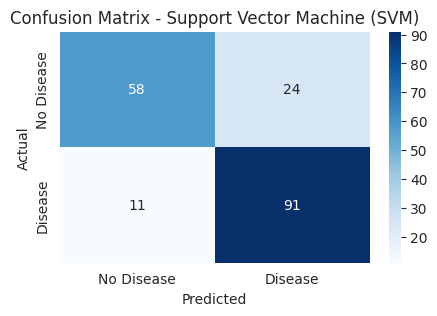

In [81]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

### Step 7: Conclusion

In this project, we built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type and max heart rate.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared two models:** Showed that the Random Forest Classifier (80% accuracy) was superior to other models.
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.